# Datasciencing unwrapped tip trajectories
Tim Tyree<br>
2.9.2021

In [1]:
from lib.my_initialization import *
from lib import *

In [95]:
#make plots in darkmode
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

- TODO: compute msd for each trajectory
- TODO: compute msd for each trajectory, removing the frames "at birth" and "at death"

- TODO: compute some orientation-blind features
    - ( cosine of angles / signed angles ) between acceleration, velocity, grad(V), and grad(dVdt)
    - speed, change of speed, 
- TODO(later): write a cell describing methods/data schema
- TODO: make umap and/or tsne scatter plot of tip trajectories
- TODO: make gif for spiral tip simulation.  consider outputing returning one image/saving one .png for a given txt call.
- TODO: keep track of an img1 =txt.V-V_thresh and img2={dVdt or lag(img1,2ms).
- TODO: color tips by duration, frame number for ^those visualizations

In [2]:
#save df as csv in care
data_folder=os.path.join(nb_dir,'Data/cloud_results')
os.chdir(data_folder)
data_fn='longest_traj_by_area_lr_pbc.csv'
df_all=pd.read_csv(data_fn)

FileNotFoundError: [Errno 2] No such file or directory: '/home/timothytyree/Documents/GitHub/care/notebooks/Data/cloud_results'

In [3]:
#TODO: store/load this in a json automatically
#Hint: see methods for param loading from 
# param_fn = 'param_set_8.json'
# param_dir = os.path.join(nb_dir,'lib/model')
# with open(os.path.join(param_dir,param_fn)) as f:
#     param_dict = json.load(f)
K12_index_set={(529, 0, 0): 0,
 (404, 1, 1): 0,
 (613, 0, 0): 0,
 (420, 0, 5): 0,
 (447, 1, 0): 0,
 (360, 1, 8): 0,
 (361, 2, 8): 0,
 (457, 3, 2): 0,
 (472, 2, 1): 0,
 (455, 2, 3): 0,
 (426, 3, 4): 0,
 (489, 3, 3): 0,
 (371, 2, 3): 0,
 (440, 3, 7): 0,
 (544, 3, 2): 0,
 (523, 0, 1): 0,
 (531, 2, 3): 0,
 (306, 1, 7): 0,
 (513, 2, 3): 0,
 (327, 3, 15): 0,
 (353, 1, 12): 0,
 (357, 1, 14): 0,
 (363, 2, 5): 0,
 (592, 2, 3): 0,
 (367, 2, 8): 0,
 (367, 2, 6): 0,
 (364, 2, 5): 0,
 (547, 2, 1): 0,
 (355, 2, 12): 0,
 (452, 1, 3): 0,
 (317, 1, 6): 0,
 (317, 1, 9): 0,
 (346, 3, 3): 0,
 (515, 0, 1): 0,
 (554, 2, 1): 0,
 (534, 1, 0): 0,
 (300, 0, 7): 0,
 (513, 0, 3): 0,
 (392, 0, 8): 0}

# visualize the longest trajectories

In [5]:
#load df 
data_folder=os.path.join(nb_dir,'Data/cloud_results')
os.chdir(data_folder)
data_fn='longest_traj_by_area_lr_pbc.csv'

In [6]:
DS=0.025
#DONE: compute the area for each trial
df=pd.read_csv(data_fn)
df['area']=df.L**2*DS**2#cm^2

In [7]:
#TODO: plot MSD for each trial
d=df[(df.L==513)& (df.txt_id1==0)&(df.txt_id2==3)]
#TODO: detect brownian motion for each trial
#TODO: compute the largest number of repeats of a single trial run

In [8]:
print(f"this spiral tip lasted {d.t.max()-d.t.min()} ms.")

this spiral tip lasted 228.0 ms.


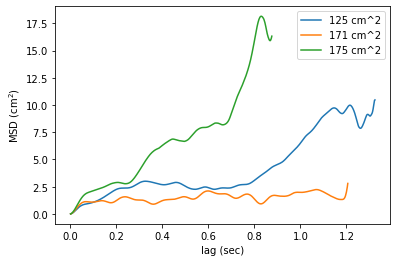

In [9]:
src_lst=['447_1_0',"523_0_1","529_0_0"]
A_lst=[447**2*DS**2,523**2*DS**2,529**2*DS**2]
for A,src in zip(A_lst,src_lst):
    d_in=df[df.src==src]

    DS=0.025#cm per pixel
    DT=2.#ms per frame
    #compute ensemble mean squared displacement
    emsd = trackpy.motion.emsd(d_in, mpp=1., fps=1.,max_lagtime=40000)
    #cast ensemble mean squared displacement into units of cm^2 and seconds
    d_out= pd.DataFrame({'msd':DS**2*emsd.values, 'lagt':emsd.index.values*DT/10**3, 'src':src})


    x_values=d_out.lagt
    y_values=d_out.msd

    plt.plot(x_values,y_values,label=f"{int(np.around(A))} cm^2")
plt.xlabel('lag (sec)')
plt.ylabel(r'MSD (cm$^2$)')
plt.legend()
plt.show()

# create longer spiral tip trajectories for LR model?
- TODO: check untruncated results using full output on UB
- if raising jump_threshold, for example, gives robust 


# TODO(later) visualize features agnostic to orientation

- TODO(option A): use umap according to https://www.r-bloggers.com/2020/11/umap-clustering-in-python/
    - !pip install umap-learn and !pip install datatable
- TODO(option B): use TSNE using sklearn.manifold.tsne
    - https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
    - disadvantage: "Global structure is not explicitly preserved. This problem is mitigated by initializing points with PCA (using `init='pca'`)."
- TODO(option C): play with sklearn.manifold in general https://scikit-learn.org/stable/modules/manifold.html#manifold
- TODO(option D): play with `pip install keras-self-attention`

then,
- TODO: use umap to visualize ^those
    - https://www.r-bloggers.com/2020/11/umap-clustering-in-python/


# TODO: compute msd for each trajectory
- TODO: compute msd for each trajectory, removing the frames "at birth" and "at death"

In [10]:
# - TODO: compute msd for each trajectory
retval= diffcoeff_table_gener(ic_suite_fn,trial_folder_name_lst,dict_kwargs_trial,
                              npartitions=2, use_cache_1=False)#, R2_thresh=0.0,duration_thresh=.0, tau_min=0.)
beep(2)
print(f"retval is {retval}")

NameError: name 'diffcoeff_table_gener' is not defined

In [11]:
diffcoeff_table_gener

NameError: name 'diffcoeff_table_gener' is not defined

In [4]:
txt=get_txt(2,2,100,100,nb_dir)
beep(1)

0

In [5]:
txt.shape

(100, 100, 18)

In [6]:
#wait a randomly selected amount of time (10-100 seconds)#UNCOMMENT_HERE
from random import randint
from time import sleep
sleep(randint(10,100))

In [8]:
txt=get_txt(2,1,50,50,nb_dir)

In [10]:
txt.shape
# beep(3)

(50, 50, 18)

# Scrum 2.13.2021

__todo(prereq)__
- merge care_worker's lib with care's lib
- verify that all FK instances of the kwarg, diffcoeff, are effected by user inputs.
- use care_worker's method to launch the following 2 settings

__todo: measure 2 settings__
- D=current, A=double (400x400)
- D=double, A=current (200x200)

todo for param_set_8_og find mean maximum spiral tip lifetime.  is it ~800ms like in the lr model?  if so, why does wj's alteration lead to longer lasting tips? what is the physiological interpretation of wj's alteration?  i.e. what does wj's alteration mean in terms of the local action potential?  what change achieveds the same effect in the LR model? is it shortened APD resulting from high K_o?

#  compute measures of lifetime for cloud_results

In [70]:
file=search_for_file()
file

File: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.4/trajectories/ic_200x200.001.12_traj_sr_400_mem_0.csv


'/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.4/trajectories/ic_200x200.001.12_traj_sr_400_mem_0.csv'

In [71]:
df=pd.read_csv(file)

In [51]:
#TODO(later?): compute mean/max lifetime versus domain size
#TODO(later?): compute mean density versus domain size

src_lst=list(zip(df.L.values,df.txt_id1.values,df.txt_id2.values))
df['src']=src_lst

In [36]:
N_rows_by_trial_values=df.groupby('src').t.count().values

In [37]:
DT=2.#ms between observations
lifetime_lst=DT*N_rows_by_trial_values

In [40]:
print(f"the mean lifetime is {np.mean(lifetime_lst)} ms")
print(f"the max lifetime is {np.max(lifetime_lst)} ms")
print(f"the number of trials considered is {lifetime_lst.shape[0]}")

the mean lifetime is 542.8717948717949 ms
the max lifetime is 1326.0 ms
the number of trials considered is 39


# measure lifetimes of local_results

In [87]:
file=search_for_file()
file

File: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_4/trajectories/ic_200x200.001.22_traj_sr_400_mem_0.csv


'/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_4/trajectories/ic_200x200.001.22_traj_sr_400_mem_0.csv'

In [88]:
L=200
DT=1

In [89]:
#measure the mean/max lifetime of the longest tip for a folder of tip logs
trgt=file[-8:]#'mem_0.csv'
input_fn_lst=get_all_files_matching_pattern(file,trgt)
len(input_fn_lst)

171

In [90]:
lifetime_lst=[]
for file in input_fn_lst:
    df=pd.read_csv(file)
    retval=get_longest_trajectories(file,width=L,height=L,DT=DT)
    lifetime=DT*retval.t.count()
    lifetime_lst.append(lifetime)
beep(2)

0

In [91]:
print(f"is DT={DT} correct?")
beep(3)
retval.head()


is DT=1 correct?


,index,t,n,x,y,theta,grad_ux,grad_uy,grad_vx,grad_vy,v,f,s,dvdt,dfdt,dsdt,frame,particle
11182,11182,1543.0,6,187.56952,188.28341,3.04513,1.94197,0.06014,2.28122,-0.27210,0.43452,0.01810,0.61185,-0.00168,-0.00543,-0.00175,1543,165
11185,11185,1544.0,6,187.91265,186.03591,2.56637,1.62655,0.36698,2.21630,-0.22344,0.48150,0.02130,0.62200,-0.00486,-0.00640,-0.00178,1544,165
11190,11190,1545.0,6,188.38927,184.77970,2.44549,1.33679,0.65447,2.19654,-0.21860,0.37868,0.02358,0.60904,0.00220,-0.00708,-0.00174,1545,165
11200,11200,1546.0,6,188.85953,183.87887,NaN,1.20594,0.78808,2.17464,-0.20573,0.39919,0.02467,0.61077,0.00011,-0.00741,-0.00175,1546,165
11202,11202,1547.0,6,189.39131,183.13727,2.77227,1.13718,0.85795,2.07865,-0.11052,0.40561,0.02292,0.61022,-0.00121,-0.00688,-0.00174,1547,165


In [92]:
#compute mean/max lifetime of spiral tips
print(f"the mean lifetime is {np.mean(lifetime_lst)} ms")
print(f"the max lifetime is {np.max(lifetime_lst)} ms")
print(f"the number of trials considered is {len(lifetime_lst)}")


the mean lifetime is 15426.017543859649 ms
the max lifetime is 297337 ms
the number of trials considered is 171


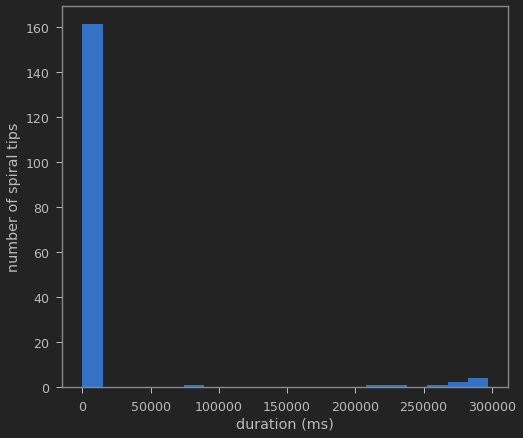

297337


In [93]:

plt.hist(lifetime_lst,bins=20)
plt.xlabel('duration (ms)')
plt.ylabel('number of spiral tips')
plt.show()
print(np.max(lifetime_lst))

In [94]:
#TODO(later): extract src from file
os.path.basename(file)

'ic_200x200.019.21_traj_sr_400_mem_0.csv'

# open trackpy and look at the goodies

In [1]:
import trackpy
from inspect import getsource

In [12]:
print(getsource(trackpy.motion._msd_fft))#msd))
# print(getsource(trackpy.motion._msd_N))
# print(getsource(trackpy.emsd))#msd))

def _msd_fft(traj, mpp, fps, max_lagtime=100, detail=False, pos_columns=None):
    """Compute the mean displacement and mean squared displacement of one
    trajectory over a range of time intervals using FFT transformation.

    The original Python implementation comes from a SO answer :
    http://stackoverflow.com/questions/34222272/computing-mean-square-displacement-using-python-and-fft#34222273.
    The algorithm is described in this paper : http://dx.doi.org/10.1051/sfn/201112010.
    """
    if pos_columns is None:
        pos_columns = ['x', 'y']
    result_columns = ['<{}>'.format(p) for p in pos_columns] + \
                     ['<{}^2>'.format(p) for p in pos_columns]

    r = traj[pos_columns].values * mpp
    t = traj['frame']

    max_lagtime = min(max_lagtime, len(t) - 1)  # checking to be safe
    lagtimes = np.arange(1, max_lagtime + 1)
    N = len(r)

    # calculate the mean displacements
    r_diff = r[:-max_lagtime-1:-1] - r[:max_lagtime]
    disp = np.cumsum(r_di

In [6]:
import pandas as pd

In [ ]:
def emsd(traj, mpp, fps, max_lagtime=100, detail=False, pos_columns=None):
    """Compute the ensemble mean squared displacements of many particles.

    Parameters
    ----------
    traj : DataFrame of trajectories of multiple particles, including
        columns particle, frame, x, and y
    mpp : microns per pixel
    fps : frames per second
    max_lagtime : intervals of frames out to which MSD is computed
        Default: 100
    detail : Set to True to include <x>, <y>, <x^2>, <y^2>. Returns
        only <r^2> by default.

    Returns
    -------
    Series[msd, index=t] or, if detail=True,
    DataFrame([<x>, <y>, <x^2>, <y^2>, msd], index=t)

    Notes
    -----
    Input units are pixels and frames. Output units are microns and seconds.
    """
    ids = []
    msds = []
    for pid, ptraj in traj.reset_index(drop=True).groupby('particle'):
        msds.append(msd(ptraj, mpp, fps, max_lagtime, True, pos_columns))
        ids.append(pid)
    msds = pandas_concat(msds, keys=ids, names=['particle', 'frame'])
    results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
    results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized
    # Above, lagt is lumped in with the rest for simplicity and speed.
    # Here, rebuild it from the frame index.
    if not detail:
        return results.set_index('lagt')['msd']
    # correctly compute the effective number of independent measurements
    results['N'] = msds['N'].sum(level=1)
    return results

# next???